<a href="https://colab.research.google.com/github/Lavalley88/Guias_python/blob/main/Guia_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

La siguiente celda se usa para importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import ppscore as pps
#import warnings

# Importar los datos

Para importar los datos con pandas tenemos 3 opciones básicas:

- Subir el archivo a colab (en el menú izquierdo, clic en el icono de carpeta) y después ejecutar *pd.read_csv('nombre_del_archivo.csv')* si es un csv o *pd.read_excel('nombre_del_archivo.xslx')* si es un excel

In [ ]:
tabla = pd.read_csv('nombre_archivo.csv')
tabla = pd.read_excel('nombre_archivo.xslx')

- Cargar el archivo desde una página web con *pd.read_csv('pagina-web.com')* 

In [ ]:
tabla = pd.read_csv('https://raw.githubusercontent.com/ArttapsTec/BasesDeDatosTEC/main/pokemon_Grass_Water.csv')

- Cargar el archivo desde una carpeta de Google Drive. Para ello primero deberemos conceder acceso a nuestro Drive, después indicar la ruta de la carpeta y después cargar el archivo (por su nombre) con pd.read_csv o pd.read_excel.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())

In [ ]:
%cd '/content/gdrive/MyDrive'

tabla = pd.read_csv('nombre_archivo.csv', sep= '|', dayfirst=True, on_bad_lines = 'skip', encoding = 'latin')
tabla = pd.read_excel('nombre_archivo.xslx')


/content/gdrive/MyDrive


# EDA: Exploratory Data Analysis

## Manipulación básica de DataFrame

### Crear una columna con valor único

In [ ]:
tabla['NuevaColumna'] = 1

### Crear una columna haciendo operaciones entre columnas

In [ ]:
tabla['SumaCol1Col2'] = tabla['Col1'] + tabla['Col2']

### Seleccionar celdas con un índice específico

- Para seleecionar sólo una fila se coloca su índice (p.e. 1)
- Para seleccionar una celda específica se colocan sus coordenadas (p.e. 1,5)
- Para seleccionar varias filas se colocan el índice inicial y final con dos puntos (p.e. 3:10)
- Se pueden seleccionar un grupo de celdas (p.e. 3:10, 1:2)
- Se puede "contar" el índice del último al primero usando negativos (p.e. -1 indica la última fila; -1,-1 indica la última celda)
- Si dejas vacío los dos puntos, se interpreta que se avanza hasta el final del rango (p.e. 2: indica las filas desde la 2 hasta la última)

In [ ]:
tabla.iloc[2:5,1:3] = 0

### Hacer un filtro

In [ ]:
tabla['Col1'] == 1

### Aplicar un filtro para seleccionar una parte de la tabla

In [ ]:
tabla.columns

Index(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'type1 (Grass 1 Water 0)', 'weight_kg', 'is_legendary'],
      dtype='object')

In [ ]:
tabla.loc[tabla['Col1'] == 1]

,Mes,No. Mes,Empresa,País,Centro de trabajo,División,ZONAS,N° de personal,Nombre del empleado,Unidad organizativa,...,Fecha de Ingreso,Género,No. Hijos,Edad,Estado civil,PERSONAL,Posición,Tipo de baja,Dif_Fecha,SumaEdadHijos
1185,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL CPA GUSTAVO BAZ,G312,#REF!,718553,CRISTIAN ALEJANDRO OROZCO AGUILAR,TLC TEQUILA HERRADURA,...,2017-04-17,Masculino,0,27,Sin información,OPERATIVO,MONTACARGUISTA DR,VOLUNTARIA,1975,36
1186,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL CPA GUSTAVO BAZ,G312,#REF!,1746179,JUAN CARLOS BARRIENTOS MAYA,TLC BDF,...,2022-07-08,Masculino,0,42,Sin información,OPERATIVO,SURTIDOR,VOLUNTARIA,69,51
1187,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL CPA GUSTAVO BAZ,G312,#REF!,3799615,ALBERTO HERNANDEZ LEON,TLC BIA,...,2022-02-07,Masculino,0,27,Sin información,OPERATIVO,MONTACARGUISTA DR,VOLUNTARIA,214,36
1188,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE,G310,#REF!,4008672,CARLOS ALBERTO DOMINGUEZ VALENCIA,GROUPE S.E.B. MEXICO SJN2,...,2019-04-29,Masculino,0,25,Sin información,OPERATIVO,SURTIDOR,VOLUNTARIA,1247,34
1189,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,#REF!,4010936,MARCO ANTONIO GARCIA RESENDIZ,SJI C.P. EMBARQUE OPL,...,2019-05-16,Masculino,0,26,Sin información,OPERATIVO,MONTACARGUISTA CB C,VOLUNTARIA,1209,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,REGION 3,4170280,NANCY GUADALUPE QUINTERO PERALES,MAQUILA EL SALTO,...,2022-07-25,Femenino,0,20,Soltero(a),SINDICALIZADO,OPERADOR MAQUILA,BAJA POR TEMPORADA,61,29
1344,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,REGION 3,4170809,MARIO EDUARDO MENDOZA VEGA,MATRE EL SALTO,...,2022-08-04,Masculino,3,30,Sin información,OPERATIVO,CHECADOR,BAJA POR TEMPORADA,33,39
1345,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,COLGATE,4170877,MARIA DEL CARMEN ESTRADA GARCIA,SJI C.P. EMBARQUE OPL,...,2022-08-05,Femenino,0,22,Sin información,OPERATIVO,SURTIDOR,BAJA POR TEMPORADA,33,31
1346,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,COLGATE,4171178,TANIA MARIA ZARAZUA ZARAZUA,SJI C.P. EMBARQUE OPL,...,2022-08-12,Femenino,0,20,Sin información,OPERATIVO,SURTIDOR,BAJA POR TEMPORADA,29,29


### Aplicar un filtro para seleccionar una parte de la tabla y columnas específicas

In [ ]:
tabla.loc[tabla['Col1'] == 1, ['Col1', 'Col2', 'Col3']]

Se pueden asignar valores específicos a celdas con un filtro o con una selección por índice

In [ ]:
# Por ejemplo, los valores de la Col1 que cumplan el filtro ahora tendrán el valor 2
tabla.loc[tabla['Col1'] == 1, 'Col1'] = 2

# Los valores de las celdas en el rango ahora tendrán el valor 3
tabla.iloc[2:5,1:2] = 3

In [ ]:
tabla

,Mes,No. Mes,Empresa,País,Centro de trabajo,División,ZONAS,N° de personal,Nombre del empleado,Unidad organizativa,...,Fecha de Ingreso,Género,No. Hijos,Edad,Estado civil,PERSONAL,Posición,Tipo de baja,Dif_Fecha,SumaEdadHijos
0,Enero,1,Desarrollo Logístico SA,MX,FLOPL CHIHUAHUA,G304,#REF!,718124,JUAN CARLOS DURAN TAPIA,MEAD JOHNSON CHIHUAHUA,...,2016-02-09,Masculino,0,30,Sin información,#REF!,MONTACARGUISTA DR,VOLUNTARIA,2164,31
1,Enero,1,Desarrollo Logístico SA,MX,FLOPL CPA GUSTAVO BAZ,G312,#REF!,718401,ARMANDO MORALES PEREZ,TLC BDF,...,2016-10-17,Masculino,0,29,Sin información,#REF!,CHECADOR,VOLUNTARIA,1922,30
2,Enero,1,Desarrollo Logístico SA,MX,FLOPL GUADALAJARA,G303,#REF!,718474,SUSANA JANET SERRANO SAUCEDO,TEQUILA HERRADURA GUADALAJARA,...,2017-01-25,Femenino,0,37,Sin información,#REF!,CHECADOR,VOLUNTARIA,1811,38
3,Enero,1,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,#REF!,4004359,SUSANA ARACELI DURAN GONZALEZ,MATRE EL SALTO,...,2019-03-14,Femenino,3,32,Sin información,#REF!,MONTACARGUISTA DR,VOLUNTARIA,1049,33
4,Enero,1,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,#REF!,4033373,LUIS ADRIAN HERNANDEZ JUAREZ,SJI C.P. GERENCIA OPERACIONES ZIMAG,...,2019-09-24,Masculino,0,26,Sin información,#REF!,MONTACARGUISTA CB C,VOLUNTARIA,841,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,REGION 3,4170280,NANCY GUADALUPE QUINTERO PERALES,MAQUILA EL SALTO,...,2022-07-25,Femenino,5,20,Soltero(a),SINDICALIZADO,OPERADOR MAQUILA,BAJA POR TEMPORADA,61,29
1344,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,REGION 3,4170809,MARIO EDUARDO MENDOZA VEGA,MATRE EL SALTO,...,2022-08-04,Masculino,5,30,Sin información,OPERATIVO,CHECADOR,BAJA POR TEMPORADA,33,39
1345,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,COLGATE,4170877,MARIA DEL CARMEN ESTRADA GARCIA,SJI C.P. EMBARQUE OPL,...,2022-08-05,Femenino,5,22,Sin información,OPERATIVO,SURTIDOR,BAJA POR TEMPORADA,33,31
1346,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,COLGATE,4171178,TANIA MARIA ZARAZUA ZARAZUA,SJI C.P. EMBARQUE OPL,...,2022-08-12,Femenino,5,20,Sin información,OPERATIVO,SURTIDOR,BAJA POR TEMPORADA,29,29


### Unir tablas

Se requiere haber cargado ambas tablas en variables distintas.
- Utilizando el método *pd.merge(tabla1, tabla2)* se pueden unir de forma horizontal (agregando columnas de una tabla a la otra)
- Utilizando el método *pd.concat(tabla1, tabla2)* se apilarán las tablas (las filas de la segunda tabla se colocarán

In [ ]:
tabla_unida = tabla1.merge(tabla2, how='inner', on='Columna_Guia') # left_on=None, right_on=None

In [ ]:
tabla_unida = pd.concat([tabla1, tabla2])

## Análisis Descriptivo

### Tabla de Datos

In [ ]:
tabla

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL
872,741,2,7412,Oricorio,Electric,Flying,Yellow,Dancer,NaN,NaN,...,0,0.6,3.4,75,70,70,98,70,93,476
783,665,1,6651,Spewpa,Bug,NaN,Black,Shed Skin,NaN,Friend Guard,...,0,0.3,8.4,45,22,60,27,30,29,213
523,438,1,4381,Bonsly,Rock,NaN,Brown,Sturdy,Rock Head,Rattled,...,0,0.5,15.0,50,80,95,10,45,10,290
460,386,1,3861,Deoxys,Psychic,NaN,Red,Pressure,NaN,NaN,...,0,1.7,60.8,50,150,50,150,50,150,600
829,709,1,7091,Trevenant,Ghost,Grass,Brown,Natural Cure,Frisk,Harvest,...,0,1.5,71.0,85,110,76,65,82,56,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,831,1,8311,Wooloo,Normal,NaN,White,Fluffy,Run Away,Bulletproof,...,0,0.6,6.0,42,40,55,40,45,48,270
638,541,1,5411,Swadloon,Bug,Grass,Green,Leaf guard,Chlorophyll,Overcoat,...,0,0.5,7.3,55,63,90,50,80,42,380
301,254,1,2541,Sceptile,Grass,NaN,Green,Overgrow,NaN,Unburden,...,0,1.7,52.2,70,85,65,105,85,120,530
148,115,1,1151,Kangaskhan,Normal,NaN,Brown,Early Bird,Scrappy,Inner Focus,...,0,2.2,80.0,105,95,80,40,80,90,490


### Tipos de datos

#### Ver tipos de datos

In [ ]:
tabla.dtypes

NUMBER              int64
CODE                int64
SERIAL              int64
NAME               object
TYPE1              object
TYPE2              object
COLOR              object
ABILITY1           object
ABILITY2           object
ABILITY HIDDEN     object
GENERATION          int64
LEGENDARY           int64
MEGA_EVOLUTION      int64
HEIGHT            float64
WEIGHT            float64
HP                  int64
ATK                 int64
DEF                 int64
SP_ATK              int64
SP_DEF              int64
SPD                 int64
TOTAL               int64
dtype: object

#### Seleccionar variables con un determinado tipo de dato

In [ ]:
tabla.select_dtypes(['int64','float64'])

,NUMBER,CODE,SERIAL,GENERATION,LEGENDARY,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL
872,741,2,7412,7,0,0,0.6,3.4,75,70,70,98,70,93,476
783,665,1,6651,6,0,0,0.3,8.4,45,22,60,27,30,29,213
523,438,1,4381,4,0,0,0.5,15.0,50,80,95,10,45,10,290
460,386,1,3861,3,1,0,1.7,60.8,50,150,50,150,50,150,600
829,709,1,7091,6,0,0,1.5,71.0,85,110,76,65,82,56,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,831,1,8311,8,0,0,0.6,6.0,42,40,55,40,45,48,270
638,541,1,5411,5,0,0,0.5,7.3,55,63,90,50,80,42,380
301,254,1,2541,3,0,0,1.7,52.2,70,85,65,105,85,120,530
148,115,1,1151,1,0,0,2.2,80.0,105,95,80,40,80,90,490


In [ ]:
numericas = tabla.select_dtypes(['int64','float64']).columns
categoricas = tabla.select_dtypes(['object']).columns

#### Cambiar tipos de datos

In [ ]:
for var in ['LEGENDARY','MEGA_EVOLUTION']:
    tabla[var] = tabla[var].astype('object')

NameError: ignored

### Trabajar con fechas

#### Convertir una columna de texto a fecha

In [ ]:
tabla['Fecha de baja'] = pd.to_datetime(tabla['Fecha de baja'])

#### Crear una columna de diferencia de fechas

- Se puede calcular la diferencia entre dos columnas (de tipo datetime) o una columna (de tipo datetime) y una fecha específica.
- Se puede configurar si el resultado será en días, meses, etc.

In [ ]:
# Diferencia entre dos columnas tipo datetime
tabla['Dif_Fecha'] = (tabla['Fecha1']-tabla['Fecha2']).dt.days

# Diferencia con fecha fija
tabla['Dif_Fecha'] = (pd.to_datetime('2022-10-01')-tabla['Fecha']).dt.days

,Mes,No. Mes,Empresa,País,Centro de trabajo,División,ZONAS,N° de personal,Nombre del empleado,Unidad organizativa,...,Fecha de Nacimiento,Fecha de Ingreso,Género,No. Hijos,Edad,Estado civil,PERSONAL,Posición,Tipo de baja,Dif_Fecha
0,Enero,1,Desarrollo Logístico SA,MX,FLOPL CHIHUAHUA,G304,#REF!,718124,JUAN CARLOS DURAN TAPIA,MEAD JOHNSON CHIHUAHUA,...,9/15/1992,2016-02-09,Masculino,0,30,Sin información,#REF!,MONTACARGUISTA DR,VOLUNTARIA,2164
1,Enero,1,Desarrollo Logístico SA,MX,FLOPL CPA GUSTAVO BAZ,G312,#REF!,718401,ARMANDO MORALES PEREZ,TLC BDF,...,10/25/1992,2016-10-17,Masculino,0,29,Sin información,#REF!,CHECADOR,VOLUNTARIA,1922
2,Enero,1,Desarrollo Logístico SA,MX,FLOPL GUADALAJARA,G303,#REF!,718474,SUSANA JANET SERRANO SAUCEDO,TEQUILA HERRADURA GUADALAJARA,...,6/2/1985,2017-01-25,Femenino,0,37,Sin información,#REF!,CHECADOR,VOLUNTARIA,1811
3,Enero,1,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,#REF!,4004359,SUSANA ARACELI DURAN GONZALEZ,MATRE EL SALTO,...,11/6/1989,2019-03-14,Femenino,3,32,Sin información,#REF!,MONTACARGUISTA DR,VOLUNTARIA,1049
4,Enero,1,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,#REF!,4033373,LUIS ADRIAN HERNANDEZ JUAREZ,SJI C.P. GERENCIA OPERACIONES ZIMAG,...,10/16/1995,2019-09-24,Masculino,0,26,Sin información,#REF!,MONTACARGUISTA CB C,VOLUNTARIA,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,REGION 3,4170280,NANCY GUADALUPE QUINTERO PERALES,MAQUILA EL SALTO,...,1/3/2002,2022-07-25,Femenino,0,20,Soltero(a),SINDICALIZADO,OPERADOR MAQUILA,BAJA POR TEMPORADA,61
1344,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL EL SALTO,G306,REGION 3,4170809,MARIO EDUARDO MENDOZA VEGA,MATRE EL SALTO,...,3/15/1992,2022-08-04,Masculino,3,30,Sin información,OPERATIVO,CHECADOR,BAJA POR TEMPORADA,33
1345,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,COLGATE,4170877,MARIA DEL CARMEN ESTRADA GARCIA,SJI C.P. EMBARQUE OPL,...,7/16/2000,2022-08-05,Femenino,0,22,Sin información,OPERATIVO,SURTIDOR,BAJA POR TEMPORADA,33
1346,Septiembre,9,Desarrollo Logístico SA,MX,FLOPL SAN JOSE ITURBIDE,G299,COLGATE,4171178,TANIA MARIA ZARAZUA ZARAZUA,SJI C.P. EMBARQUE OPL,...,10/4/2002,2022-08-12,Femenino,0,20,Sin información,OPERATIVO,SURTIDOR,BAJA POR TEMPORADA,29


### Estadística Descriptiva Básica

In [ ]:
tabla.describe()

,NUMBER,CODE,SERIAL,GENERATION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,438.160000,1.210000,4382.810000,4.270000,1.264000,64.189000,69.860000,81.690000,74.280000,74.810000,71.890000,67.050000,439.580000
std,246.337689,0.555869,2463.358116,2.196669,1.451124,137.206749,24.068513,28.255935,24.967081,34.392181,27.308523,28.775472,117.990085
min,6.000000,1.000000,63.000000,1.000000,0.200000,0.800000,20.000000,22.000000,30.000000,10.000000,25.000000,10.000000,205.000000
25%,227.250000,1.000000,2273.500000,3.000000,0.600000,10.025000,54.250000,64.750000,55.000000,49.500000,50.000000,45.000000,348.750000
50%,412.000000,1.000000,4122.000000,4.000000,0.900000,27.000000,65.000000,80.000000,70.000000,74.000000,70.000000,65.000000,462.500000
75%,639.750000,1.000000,6398.500000,6.000000,1.500000,55.250000,80.000000,100.000000,90.000000,95.500000,90.000000,90.750000,516.250000
max,875.000000,4.000000,8752.000000,8.000000,9.800000,999.900000,137.000000,150.000000,152.000000,180.000000,160.000000,150.000000,770.000000


### Histogramas de todas las variables

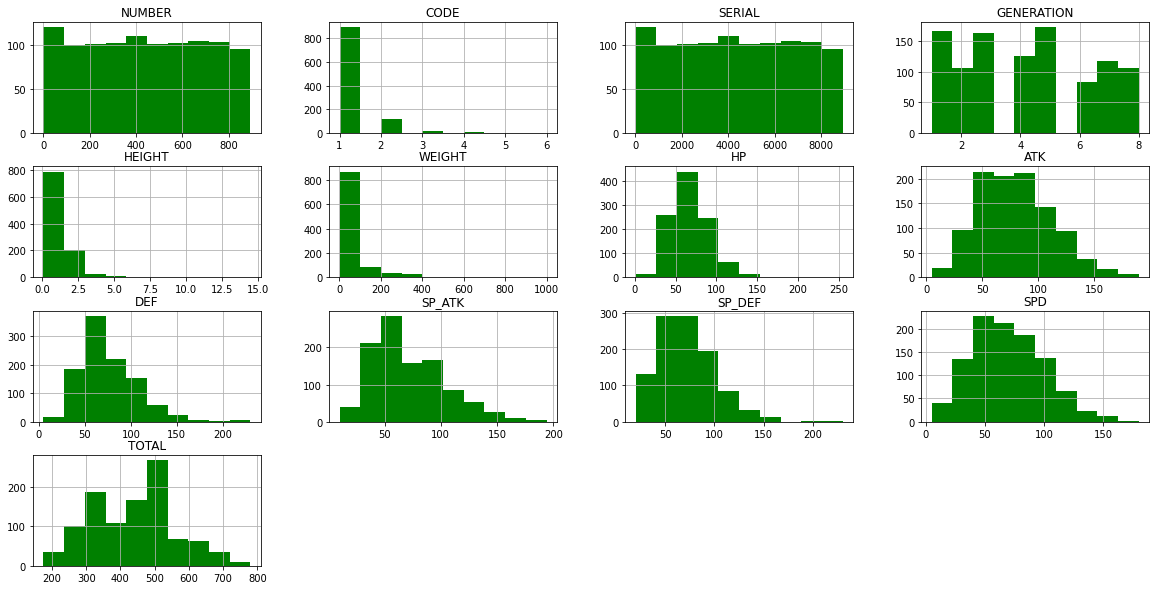

In [ ]:
hists = tabla.hist(figsize=(20,10), color = 'green')

### Histograma de sólo 1 variable

In [ ]:
tabla['Nombre de la variable'].hist()

### Contar Valores Faltantes

In [ ]:
tabla.isna().sum()

Mes                      0
No. Mes                  0
Empresa                  0
País                     0
Centro de trabajo        0
División                 0
ZONAS                   16
N° de personal           0
Nombre del empleado      0
Unidad organizativa      0
Fecha de baja            0
Fecha de Nacimiento      0
Fecha de Ingreso         0
Género                   0
No. Hijos                0
Edad                     0
Estado civil             0
PERSONAL               100
Posición                 0
Tipo de baja             0
Dif_Fecha                0
SumaEdadHijos            0
dtype: int64

### Contar Valores Faltantes (considerando "inf" como nulos)

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
    display(tabla.isna().sum())

Mes                      0
No. Mes                  0
Empresa                  0
País                     0
Centro de trabajo        0
División                 0
ZONAS                   16
N° de personal           0
Nombre del empleado      0
Unidad organizativa      0
Fecha de baja            0
Fecha de Nacimiento      0
Fecha de Ingreso         0
Género                   0
No. Hijos                0
Edad                     0
Estado civil             0
PERSONAL               100
Posición                 0
Tipo de baja             0
Dif_Fecha                0
SumaEdadHijos            0
dtype: int64

### Identificar valores atípicos

#### Creación de Boxplots

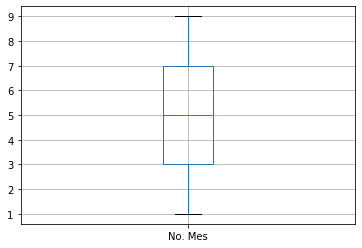

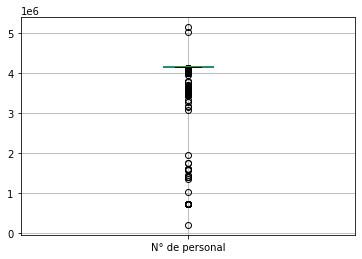

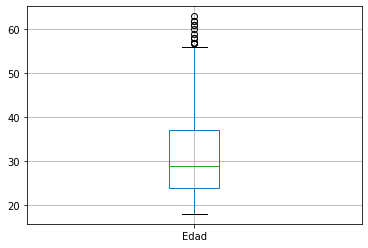

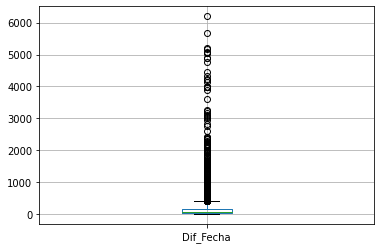

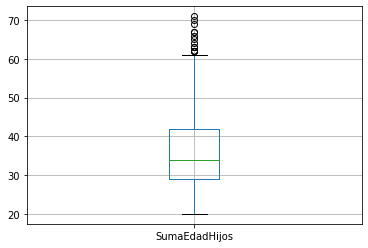

In [ ]:
for column in numericas:
    plt.figure()
    tabla.boxplot([column])

#### Outliers por cuantil (95%)

In [ ]:
numericas = ['attack', 'base_happiness']

In [ ]:
(tabla[numericas]>tabla[numericas].quantile(0.95)).sum()

attack            8
base_happiness    1
dtype: int64


attack            5
base_happiness    6
dtype: int64

#### Outliers por cuantil (5%)

In [ ]:
(tabla[numericas]<tabla[numericas].quantile(0.05)).sum()

NUMBER        52
CODE           0
SERIAL        52
GENERATION     0
HEIGHT        32
WEIGHT        52
HP            51
ATK           34
DEF           42
SP_ATK        44
SP_DEF        52
SPD           46
TOTAL         48
dtype: int64

#### Outliers por desviaciones estándar (3 sigmas)

In [ ]:
from scipy import stats

In [ ]:
(np.abs(stats.zscore(tabla[numericas]))>3).sum()

attack            1
base_happiness    6
dtype: int64

#### Outliers generales por Local Outlier Factor

In [ ]:
outlierDetector = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
indicador = outlierDetector.fit_predict(tabla[numericas])
tabla[indicador==-1]

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL
416,352,1,3521,Kecleon,Normal,NaN,Green,Color Change,NaN,Protean,...,0,1.0,22.0,60,90,70,60,120,40,440
418,354,1,3541,Banette,Ghost,NaN,Black,Insomnia,Frisk,Cursed Body,...,0,1.1,12.5,64,115,65,83,63,65,455
423,358,1,3581,Chimecho,Psychic,NaN,Blue,Levitate,NaN,NaN,...,0,0.6,1.0,75,50,80,95,90,65,455
478,401,1,4011,Kricketot,Bug,NaN,Red,Shed Skin,NaN,Run Away,...,0,0.3,2.2,37,25,41,25,41,25,194
483,406,1,4061,Budew,Grass,Poison,Green,Natural Cure,Poison Point,Leaf Guard,...,0,0.2,1.2,40,30,35,50,70,55,280
496,415,1,4151,Combee,Bug,Flying,Yellow,Honey Gather,NaN,Hustle,...,0,0.3,5.5,30,30,42,30,42,70,244
568,479,1,4791,Rotom,Electric,Ghost,Red,Levitate,NaN,NaN,...,0,0.3,0.3,50,50,77,95,77,91,440
574,480,1,4801,Uxie,Psychic,NaN,Yellow,Levitate,NaN,NaN,...,0,0.3,0.3,75,75,130,75,130,95,580
583,488,1,4881,Cresselia,Psychic,NaN,Yellow,Levitate,NaN,NaN,...,0,1.5,85.6,120,70,120,75,130,85,600
613,517,1,5171,Munna,Psychic,NaN,Pink,Forewarn,Synchronize,Telepathy,...,0,0.6,23.3,76,25,45,67,55,24,292


## Análisis Relacional

### Relaciones Matemáticas

#### Correlación de Pearson, Kendall o Spearman

In [ ]:
tabla.corr(method = 'spearman')

,NUMBER,CODE,SERIAL,GENERATION,LEGENDARY,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL
NUMBER,1.000000,-0.066701,0.999999,0.880546,0.215485,-0.152983,-0.025615,-0.021432,0.106937,0.113311,0.108777,0.085891,0.071127,0.014179,0.126360
CODE,-0.066701,1.000000,-0.066003,0.116259,0.116842,0.536579,0.133244,0.109533,0.099106,0.223445,0.188270,0.155984,0.181755,0.196552,0.261514
SERIAL,0.999999,-0.066003,1.000000,0.880681,0.215490,-0.152602,-0.025567,-0.021398,0.106953,0.113384,0.108838,0.085922,0.071179,0.014195,0.126434
GENERATION,0.880546,0.116259,0.880681,1.000000,0.123242,-0.177688,-0.074669,-0.055070,0.054255,0.079273,0.058597,0.005019,0.005883,-0.016708,0.045383
LEGENDARY,0.215485,0.116842,0.215490,0.123242,1.000000,0.033857,0.286100,0.254185,0.323571,0.331648,0.292578,0.367521,0.324482,0.331182,0.480481
MEGA_EVOLUTION,-0.152983,0.536579,-0.152602,-0.177688,0.033857,1.000000,0.237824,0.198132,0.123329,0.262201,0.214563,0.220903,0.240393,0.172808,0.320066
HEIGHT,-0.025615,0.133244,-0.025567,-0.074669,0.286100,0.237824,1.000000,0.845548,0.642322,0.630984,0.499205,0.475768,0.493129,0.333178,0.728424
WEIGHT,-0.021432,0.109533,-0.021398,-0.055070,0.254185,0.198132,0.845548,1.000000,0.611448,0.593757,0.535736,0.341983,0.442553,0.199512,0.646885
HP,0.106937,0.099106,0.106953,0.054255,0.323571,0.123329,0.642322,0.611448,1.000000,0.581623,0.452890,0.471805,0.489442,0.266638,0.720842
ATK,0.113311,0.223445,0.113384,0.079273,0.331648,0.262201,0.630984,0.593757,0.581623,1.000000,0.513420,0.355269,0.323992,0.369089,0.727732


In [ ]:
pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=8b00e458f5c9b6e9faf0895fe7ab637758e8a7842149c804f291c47b3ca1575f
  Stored in directory: /root/.cache/pip/wheels/df/f9/57/05d08363f49803608cd482928dce0a93d3aedcaddd3007c97d
Successfully built ppscore


#### Predictive Power Score

In [ ]:
pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=b384417427194a8af3ebb315d981c0744a8f92a44d8f74076443028709ea0e0b
  Stored in directory: /root/.cache/pip/wheels/df/f9/57/05d08363f49803608cd482928dce0a93d3aedcaddd3007c97d
Successfully built ppscore


In [ ]:
import ppscore as pps
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(tabla)
ppscoreT[ppscoreT['y']=='Renuncia']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,NUMBER,NUMBER,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,NUMBER,CODE,0.000000,regression,True,mean absolute error,0.186359,0.327107,DecisionTreeRegressor()
2,NUMBER,SERIAL,0.996139,regression,True,mean absolute error,2235.992315,8.632104,DecisionTreeRegressor()
3,NUMBER,NAME,0.141685,classification,True,weighted F1,0.002882,0.144159,DecisionTreeClassifier()
4,NUMBER,TYPE1,0.521987,classification,True,weighted F1,0.073007,0.556885,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
479,TOTAL,DEF,0.177914,regression,True,mean absolute error,23.251681,19.114878,DecisionTreeRegressor()
480,TOTAL,SP_ATK,0.281879,regression,True,mean absolute error,25.809798,18.534565,DecisionTreeRegressor()
481,TOTAL,SP_DEF,0.277010,regression,True,mean absolute error,21.627281,15.636301,DecisionTreeRegressor()
482,TOTAL,SPD,0.133257,regression,True,mean absolute error,24.341979,21.098228,DecisionTreeRegressor()


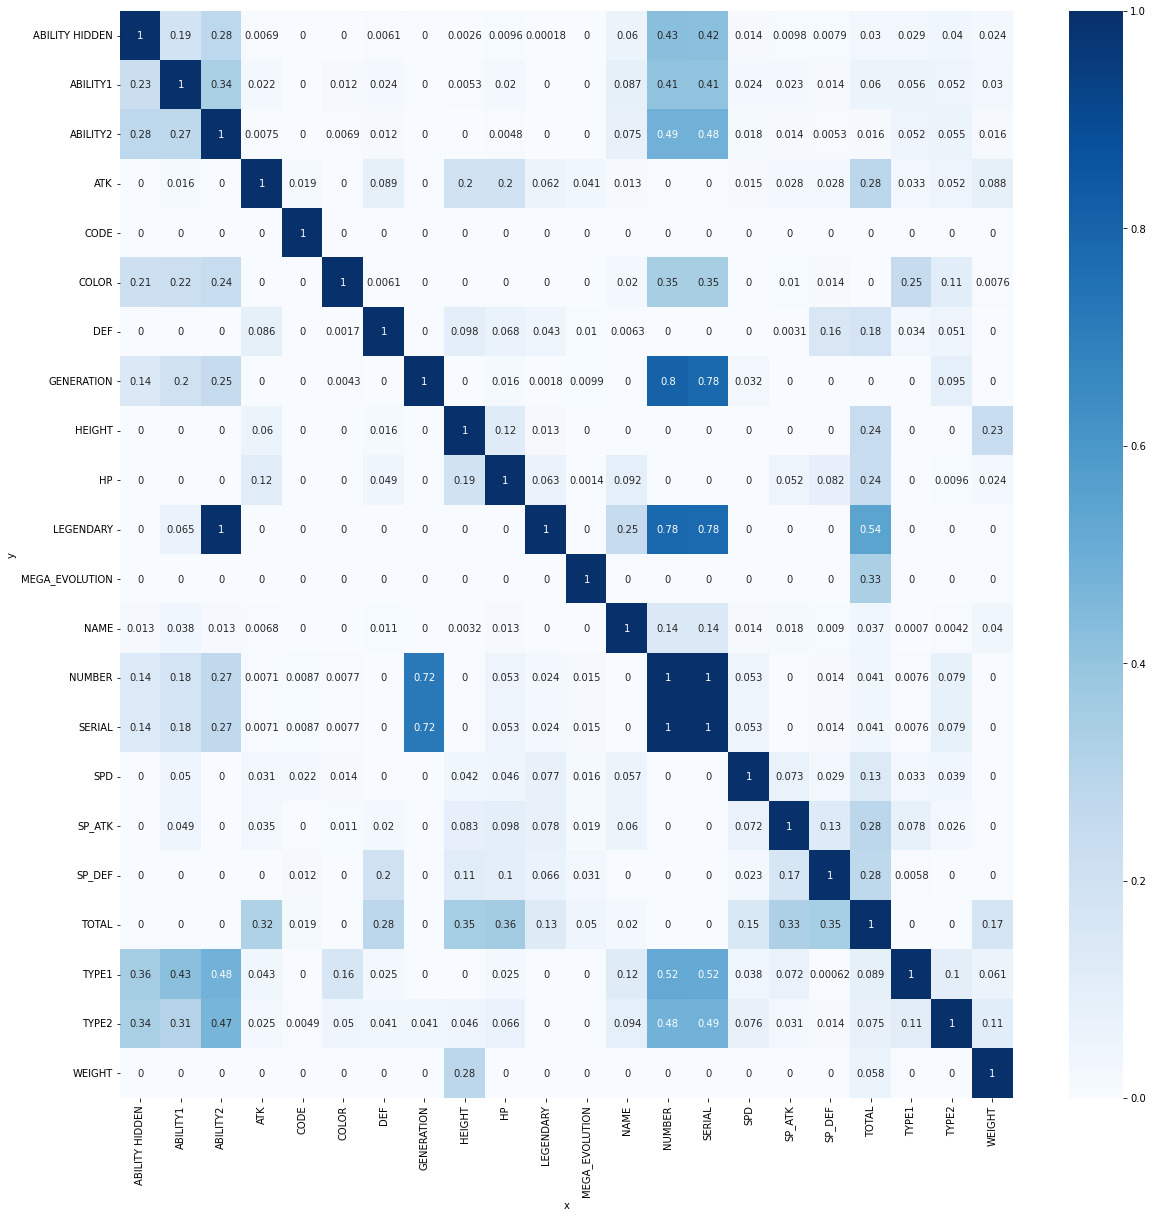

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
matrix_df = ppscoreT[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", annot=True, ax = ax)

### Relaciones Gráficas

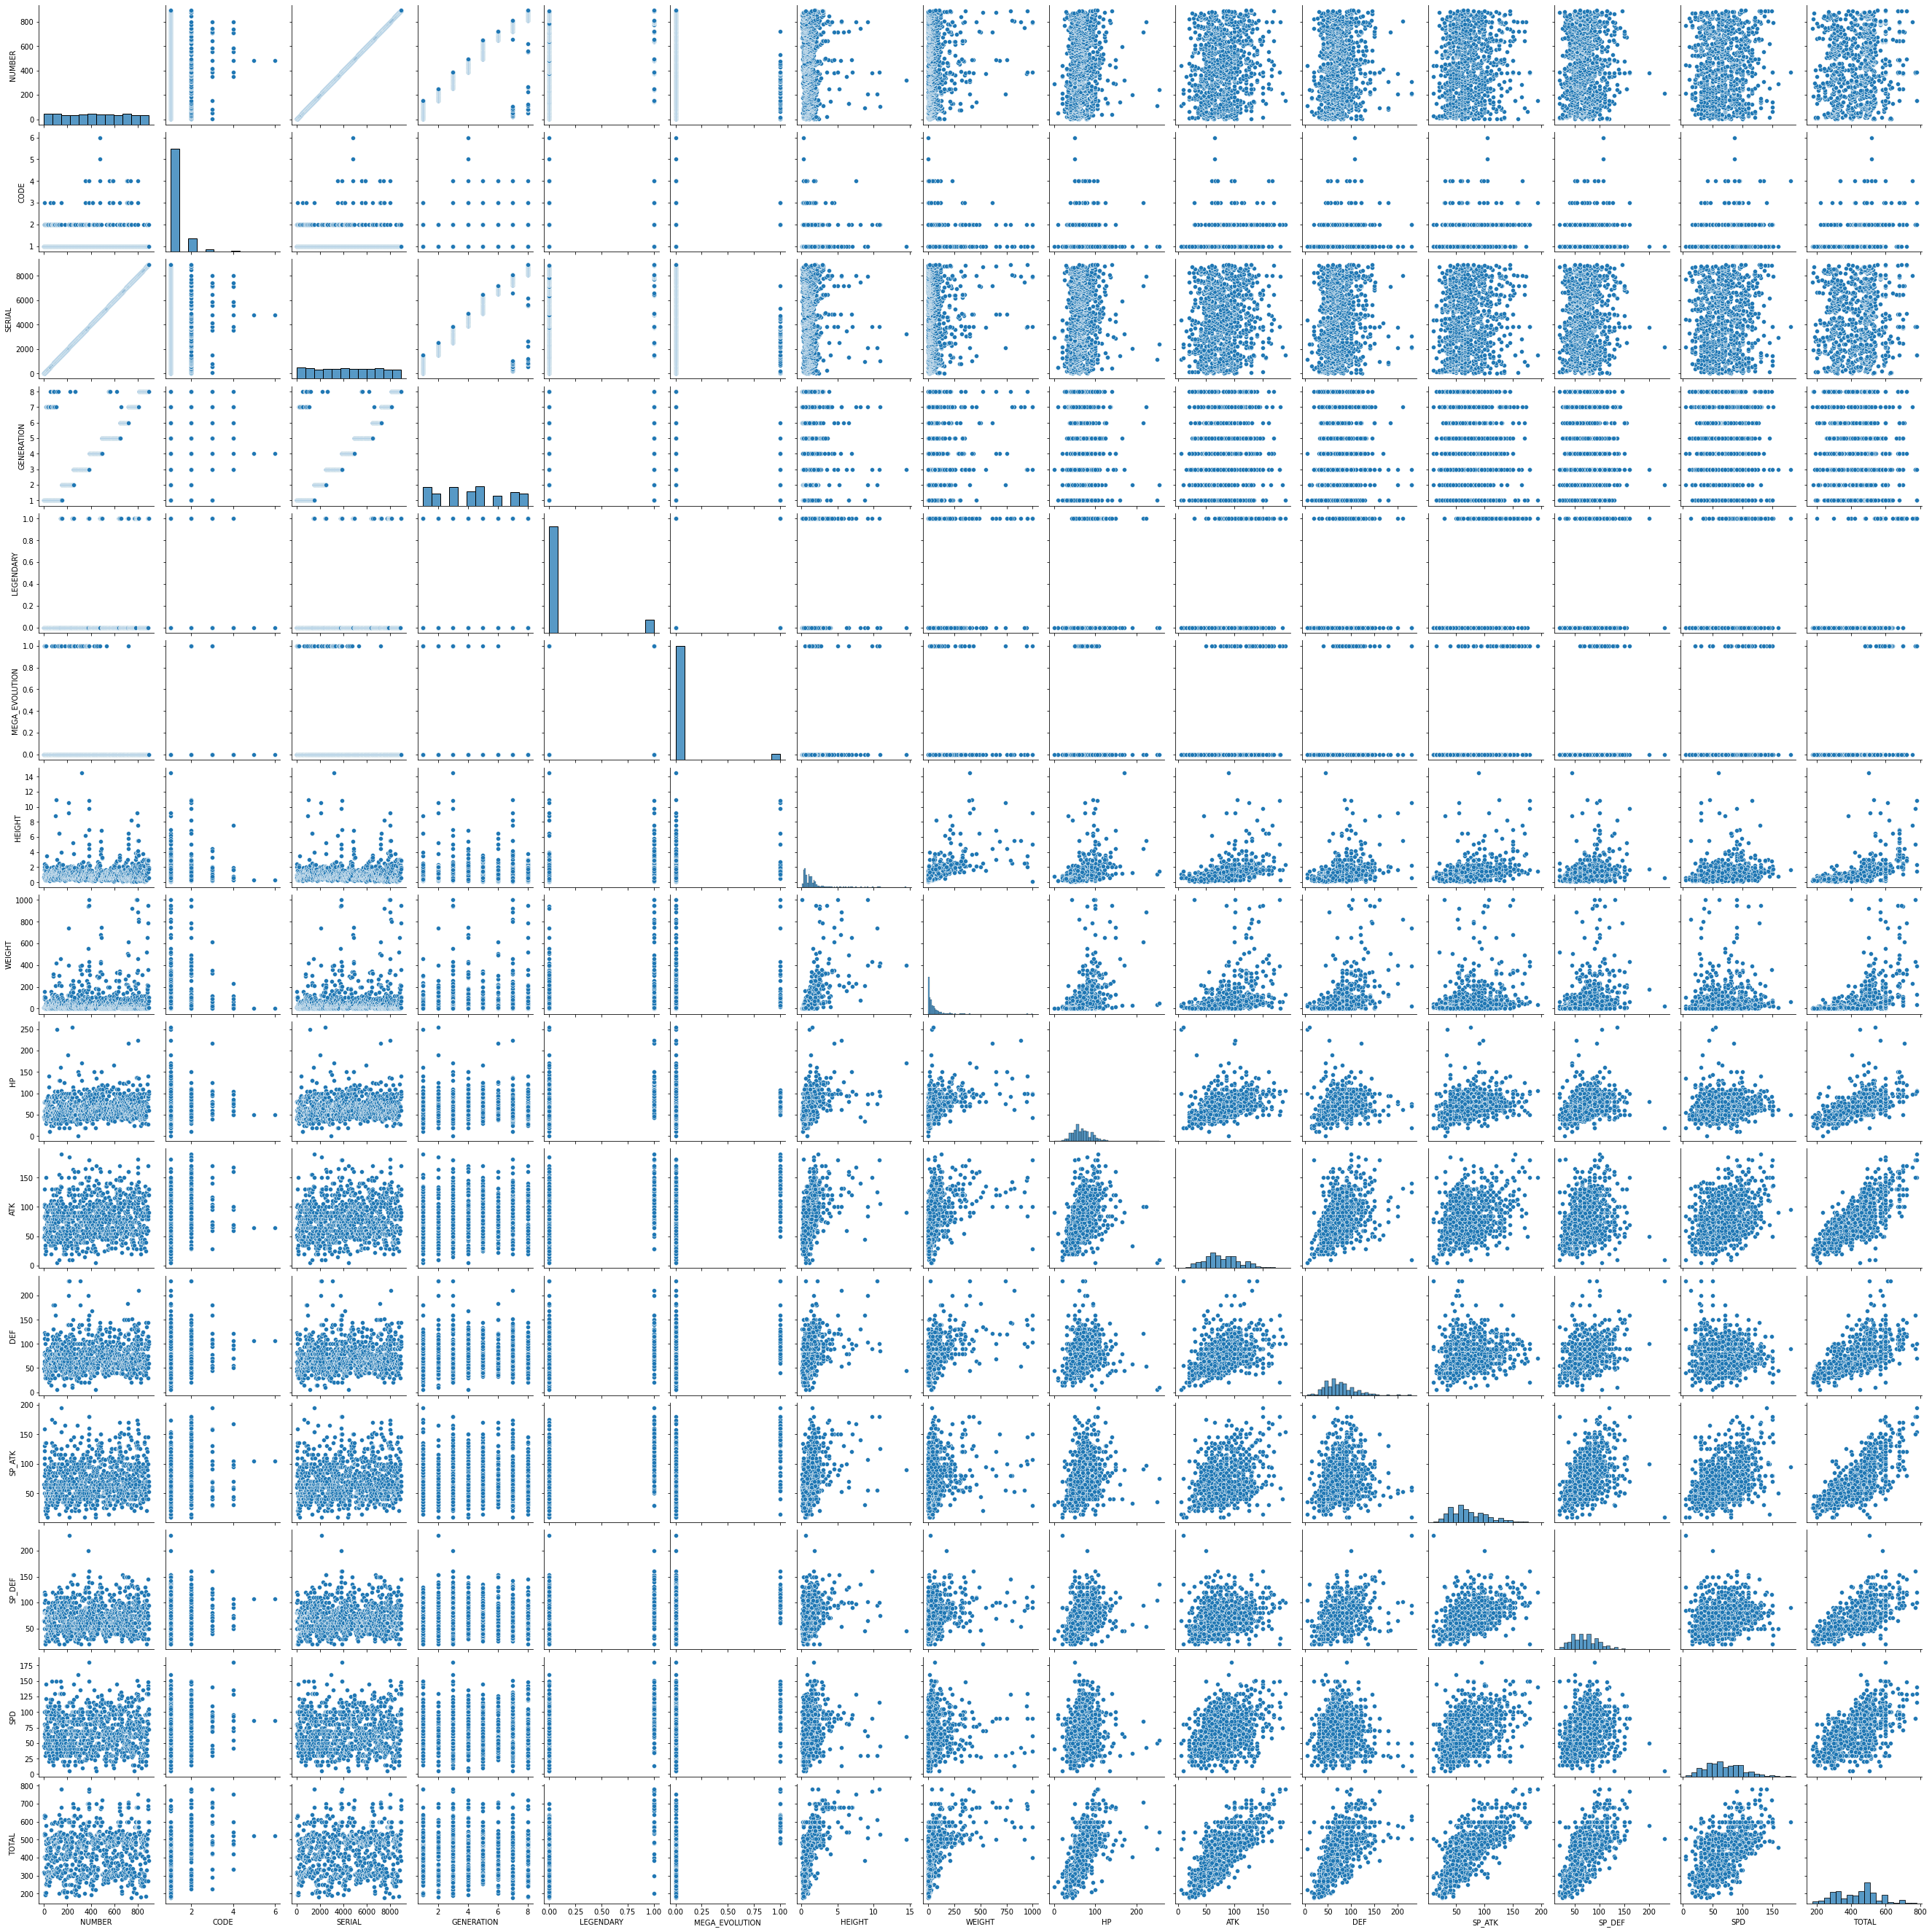

In [ ]:
sns.pairplot(tabla).savefig('graficas.png')

# Separación de datos: Prueba y Entrenamiento

Se crea una columna que indique si los datos son de Entrenamiento (Train = 1) o de Prueba (Train = 0)

In [ ]:
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(tabla):
    print(len(train_index))
    print(len(test_index))
tabla['Train'] = 0
tabla.loc[tabla.index.isin(train_index),'Train'] = 1

728
313


# Pre-procesamiento de datos

## Eliminar columna

In [ ]:
tabla.drop(['SERIAL', 'CODE'], axis = 1, inplace = False)

,NUMBER,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,GENERATION,LEGENDARY,...,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,Train
0,1,Bulbasaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,1,0,...,0.7,6.9,45,49,49,65,65,45,318,1
1,2,Ivysaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,1,0,...,1.0,13.0,60,62,63,80,80,60,405,0
2,3,Venusaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,1,0,...,2.0,100.0,80,82,83,100,100,80,525,0
3,3,Mega Venusaur,Grass,Poison,Green,Thick Fat,NaN,NaN,1,0,...,2.4,155.5,80,100,123,122,120,80,625,1
4,4,Charmander,Fire,NaN,Red,Blaze,NaN,Solar Power,1,0,...,0.6,8.5,39,52,43,60,50,65,309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,890,Eternatus,Poison,Dragon,Purple,Pressure,NaN,NaN,8,1,...,2.0,950.0,140,85,95,145,95,130,690,0
1037,891,Kubfu,Fighting,NaN,Grey,Inner Focus,NaN,NaN,8,1,...,0.6,12.0,60,90,60,53,50,72,385,1
1038,892,Urshifu,Fighting,Dark,Grey,Unseen Fist,NaN,NaN,8,1,...,1.9,105.0,100,130,100,63,60,97,550,0
1039,892,Urshifu,Fighting,Water,Grey,Unseen Fist,NaN,NaN,8,1,...,1.9,105.0,100,130,100,63,60,97,550,0


## Valores Nulos

### Eliminación de valores nulos

In [ ]:
tabla.dropna(inplace = False)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Train
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


### Imputación de valores nulos (variables numéricas)

In [ ]:
for var in ['ATK','DEF']:
    x = tabla.loc[tabla['Train'] == 1, var].mean()
    tabla[var].fillna(x, inplace = True)

### Imputación de valores nulos (variables cualitativas)

In [ ]:
for var in categoricas:
    tabla[var].fillna('NA', inplace = True)
tabla

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,Train
0,1,1,11,Bulbasaur,Grass,Poison,Green,Overgrow,NA,Chrolophyll,...,0.7,6.9,45,49,49,65,65,45,318,1
1,2,1,21,Ivysaur,Grass,Poison,Green,Overgrow,NA,Chrolophyll,...,1.0,13.0,60,62,63,80,80,60,405,0
2,3,1,31,Venusaur,Grass,Poison,Green,Overgrow,NA,Chrolophyll,...,2.0,100.0,80,82,83,100,100,80,525,0
3,3,2,32,Mega Venusaur,Grass,Poison,Green,Thick Fat,NA,NA,...,2.4,155.5,80,100,123,122,120,80,625,1
4,4,1,41,Charmander,Fire,NA,Red,Blaze,NA,Solar Power,...,0.6,8.5,39,52,43,60,50,65,309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,890,1,8901,Eternatus,Poison,Dragon,Purple,Pressure,NA,NA,...,2.0,950.0,140,85,95,145,95,130,690,0
1037,891,1,8911,Kubfu,Fighting,NA,Grey,Inner Focus,NA,NA,...,0.6,12.0,60,90,60,53,50,72,385,1
1038,892,1,8921,Urshifu,Fighting,Dark,Grey,Unseen Fist,NA,NA,...,1.9,105.0,100,130,100,63,60,97,550,0
1039,892,2,8922,Urshifu,Fighting,Water,Grey,Unseen Fist,NA,NA,...,1.9,105.0,100,130,100,63,60,97,550,0


## Valores atípicos

### Eliminar atípicos generales por LocalOutlierFactor

In [ ]:
outlierDetector = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02, novelty = True)
outlierDetector.fit(tabla.loc[tabla['Train'] == 1, numericas])
ind_train = outlierDetector.predict(tabla[numericas])
tabla = tabla.loc[ind_train == 1]

### Cortar atípicos al rango de outliers

In [ ]:
numericas = ['Attack','Defense','Speed']
for var in numericas:
    lim_sup = tabla.loc[filtroTrain, var].quantile(0.99)
    lim_inf = tabla.loc[filtroTrain, var].quantile(0.01)
    tabla[var].clip(lim_inf, lim_sup, inplace=True)

In [ ]:
tabla[numericas]

,attack,base_happiness
0,49.0,70.0
1,62.0,70.0
2,100.0,35.0
3,48.0,35.0
4,63.0,35.0
...,...,...
187,60.0,70.0
188,105.0,70.0
189,130.0,70.0
190,75.0,70.0


# Procesamiento de datos

## Codificar variables categóricas

In [ ]:
categoricas = ['Posición','Unidad organizativa','Género']
tabla2 = pd.get_dummies(tabla2 ,columns = categoricas, drop_first=True)

In [ ]:
#tabla[var].cat.codes
import pandas as pd

pd.Series(['Soltero','Viudo','Casado','Divorciado']).astype('category').cat.codes

0    2
1    3
2    0
3    1
dtype: int8

## Transformaciones

### Transformar una columna matemáticamente

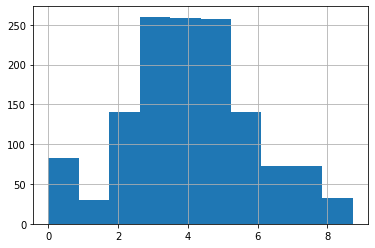

In [ ]:
tabla['Var_Normalizada'] = np.log(tabla['Variable'])

### Transformar todas las columnas

In [ ]:
transformer = PowerTransformer()
transformer.fit(tabla.loc[tabla['Train'] == 1, numericas])
tabla[numericas] = transformer.transform(tabla[numericas])
tabla

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,Train
0,-2.140990,-0.410535,-2.156124,Bulbasaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,-0.432359,-0.953220,-0.963535,-0.949705,-0.789085,-0.072147,-0.112277,-0.768222,-0.961714,1
1,-2.121304,-0.410535,-2.133556,Ivysaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,0.103692,-0.714906,-0.252139,-0.478825,-0.212927,0.376632,0.421440,-0.224260,-0.216134,0
2,-2.103713,-0.410535,-2.114273,Venusaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,1.118132,1.191357,0.533312,0.173553,0.475985,0.891477,1.034684,0.426185,0.753967,0
3,-2.103713,2.433700,-2.112465,Mega Venusaur,Grass,Poison,Green,Thick Fat,NaN,NaN,...,1.357280,1.655553,0.533312,0.697777,1.510506,1.380392,1.568079,0.426185,1.523146,1
4,-2.087532,-0.410535,-2.096923,Charmander,Fire,NaN,Red,Blaze,NaN,Solar Power,...,-0.655545,-0.888725,-1.291808,-0.837407,-1.064580,-0.237703,-0.738960,-0.054787,-1.041380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1.549269,-0.410535,1.547618,Eternatus,Poison,Dragon,Purple,Pressure,NaN,NaN,...,1.118132,2.164214,2.300544,0.264756,0.827940,1.829386,0.889949,1.824427,2.007659,0
1037,1.552090,-0.410535,1.550433,Kubfu,Fighting,NaN,Grey,Inner Focus,NaN,NaN,...,-0.655545,-0.752591,-0.252139,0.413248,-0.329163,-0.486402,-0.738960,0.174392,-0.383931,1
1038,1.554911,-0.410535,1.553247,Urshifu,Fighting,Dark,Grey,Unseen Fist,NaN,NaN,...,1.048075,1.247767,1.198008,1.464232,0.963058,-0.137270,-0.308962,0.931431,0.949233,0
1039,1.554911,2.433700,1.553529,Urshifu,Fighting,Water,Grey,Unseen Fist,NaN,NaN,...,1.048075,1.247767,1.198008,1.464232,0.963058,-0.137270,-0.308962,0.931431,0.949233,0


### Transformar sólo una lista de columnas

In [ ]:
columnas_transformer = ['WEIGHT','HEIGHT','HP']
transformer = PowerTransformer()
transformer.fit(tabla.loc[tabla['Train'] == 1, columnas_transformer])
tabla[columnas_transformer] = transformer.transform(tabla[columnas_transformer])
tabla

## Escalamientos

### Escalar todas las columnas

In [ ]:
scaler = MinMaxScaler()
scaler.fit(tabla.loc[tabla['Train'] == 1, numericas])
tabla[numericas] = scaler.transform(tabla[numericas])
tabla

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,Train
0,0.000000,0.0,0.000000,Bulbasaur,Grass,Poison,Green,Overgrow,NA,Chrolophyll,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1
1,0.001124,0.0,0.001124,Ivysaur,Grass,Poison,Green,Overgrow,NA,Chrolophyll,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0
2,0.002247,0.0,0.002247,Venusaur,Grass,Poison,Green,Overgrow,NA,Chrolophyll,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0
3,0.002247,0.2,0.002360,Mega Venusaur,Grass,Poison,Green,Thick Fat,NA,NA,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1
4,0.003371,0.0,0.003371,Charmander,Fire,NA,Red,Blaze,NA,Solar Power,...,0.0,0.262295,0.0,0.230769,0.000000,0.000000,0.0,1.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.997753,0.2,0.997865,Zamazanta,Fighting,Steel,Red,Dauntless Shield,NA,NA,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0
1037,1.000000,0.0,1.000000,Kubfu,Fighting,NA,Grey,Inner Focus,NA,NA,...,0.0,0.836066,1.0,1.000000,0.785714,0.000000,0.0,1.0,0.770115,1
1038,1.001124,0.0,1.001124,Urshifu,Fighting,Dark,Grey,Unseen Fist,NA,NA,...,1.0,1.000000,1.0,1.000000,1.000000,0.000000,0.0,1.0,1.000000,0
1039,1.001124,0.2,1.001236,Urshifu,Fighting,Water,Grey,Unseen Fist,NA,NA,...,1.0,1.000000,1.0,1.000000,1.000000,0.000000,0.0,1.0,1.000000,0


### Guardar datos como ".csv"
Para guardar una tabla como .csv sólo debe indicarse el método de ".to_csv" e indicar el nombre del archivo que se quiere crear.

In [ ]:
tabla.to_csv('nombre_archivo.csv')

### Escalar columnas en específico

In [ ]:
scaler = MinMaxScaler()
for var in ['WEIGHT','ATK','DEF']:
    scaler.fit(tabla.loc[tabla['Train'] == 1, [var]])
    tabla[var] = scaler.transform(tabla.loc[tabla['Train'] == 1, [var]])
tabla

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,Train
0,1,1,11,Bulbasaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,0.7,0.006801,45,0.237838,0.195556,65,65,45,318,1
1,2,1,21,Ivysaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,1.0,0.012903,60,0.308108,0.257778,80,80,60,405,0
2,3,1,31,Venusaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,2.0,0.099920,80,0.416216,0.346667,100,100,80,525,0
3,3,2,32,Mega Venusaur,Grass,Poison,Green,Thick Fat,NaN,NaN,...,2.4,0.155431,80,0.513514,0.524444,122,120,80,625,1
4,4,1,41,Charmander,Fire,NaN,Red,Blaze,NaN,Solar Power,...,0.6,0.008402,39,0.254054,0.168889,60,50,65,309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,890,1,8901,Eternatus,Poison,Dragon,Purple,Pressure,NaN,NaN,...,2.0,0.950090,140,0.432432,0.400000,145,95,130,690,0
1037,891,1,8911,Kubfu,Fighting,NaN,Grey,Inner Focus,NaN,NaN,...,0.6,0.011902,60,0.459459,0.244444,53,50,72,385,1
1038,892,1,8921,Urshifu,Fighting,Dark,Grey,Unseen Fist,NaN,NaN,...,1.9,0.104921,100,0.675676,0.422222,63,60,97,550,0
1039,892,2,8922,Urshifu,Fighting,Water,Grey,Unseen Fist,NaN,NaN,...,1.9,0.104921,100,0.675676,0.422222,63,60,97,550,0


## Selección de variables

### Selección Univariable

#### Información Mutua

In [ ]:
columnas = ['WEIGHT', 'HEIGHT']
X = tabla.loc[tabla['Train'] == 1, columnas]
Y = tabla.loc[tabla['Train'] == 1, 'LEGENDARY']

#results_MI = mutual_info_regression(X = X, y = Y)
results_MI = mutual_info_classif(X = X, y = Y)

tabla_MI = pd.DataFrame(data = results_MI, index = X.columns, columns = ['MI']).sort_values(by=['MI'], ascending=False)
tabla_MI

KeyError: ignored

#### Chi2

In [ ]:
columnas = ['TYPE1','TYPE2']
X = tabla.loc[tabla['Train'] == 1, columnas]
Y = tabla.loc[tabla['Train'] == 1, 'LEGENDARY']

results_chi2 = chi2(X.apply(lambda x: x.astype('category').cat.codes),Y)[0]
tabla_chi2 = pd.DataFrame(data = results_chi2, index = X.columns, columns = ['Chi2']).sort_values(by=['Chi2'], ascending=False)
tabla_chi2

KeyError: ignored

#### Correlación

In [ ]:
results_corr = tabla.corr(method = 'pearson').loc['LEGENDARY']
tabla_corr = pd.DataFrame(data = np.array(results_corr), index = results_corr.index, columns = ['Corr']).sort_values(by=['Corr'], ascending=False)
tabla_corr

#### PPS

In [ ]:
warnings.filterwarnings("ignore")
ppscoreT = pps.matrix(tabla.loc[tabla['Train']==1])
tabla_pps = ppscoreT[ppscoreT['y'] == 'LEGENDARY'].sort_values(by = ['ppscore'], ascending = False)
tabla_pps

### Selección Recursiva

#### Eliminación Recursiva de Variables (RFE)

In [ ]:
columnas = ['NUMBER','WEIGHT','HEIGHT','HP','ATK']
X = tabla.loc[tabla['Train']==1, columnas].drop('LEGENDARY', axis = 1)
y = tabla.loc[tabla['Train']==1, 'LEGENDARY']

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

results_RFE = pd.DataFrame(data = selector.support_, index = X.columns, columns = ['Resultados'])
results_RFE

,Resultados
NUMBER,True
CODE,False
SERIAL,True
GENERATION,False
MEGA_EVOLUTION,False
HEIGHT,False
WEIGHT,True
HP,False
ATK,False
DEF,False


### Selección Incrustada

#### Entropía y Gini en RandomForest

In [ ]:
rf_entropy = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=10)
rf_gini = RandomForestClassifier(n_estimators = 100,criterion='gini',max_features=14,max_depth=20)

X = tabla.loc[tabla['Train']==1, numericas].drop('LEGENDARY', axis = 1)
y = tabla.loc[tabla['Train']==1, 'LEGENDARY']

rf_entropy.fit(X,y)
rf_gini.fit(X,y)

tabla_ent_gini = pd.DataFrame(data={
                   'Variables':X.columns,
                   'Entropía':rf_entropy.feature_importances_,
                   'Gini':rf_gini.feature_importances_}).sort_values(by=['Gini'],ascending=False)
tabla_ent_gini

,Variables,Entropía,Gini
2,SERIAL,0.195281,0.277289
0,NUMBER,0.204924,0.256926
3,GENERATION,0.092562,0.111181
10,SP_ATK,0.122974,0.096047
11,SP_DEF,0.110995,0.088573
12,SPD,0.054274,0.062889
8,ATK,0.051268,0.047011
1,CODE,0.020067,0.015793
9,DEF,0.038559,0.015470
5,HEIGHT,0.029967,0.011175


# Entrenamiento de Algoritmos

## Variables seleccionadas

In [ ]:
varSelected = ['HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK', 'SP_DEF', 'SPD','TOTAL']

## Preparación Final de Datos

In [ ]:
X_train = tabla.loc[tabla['Train']==1, varSelected]
y_train = tabla.loc[tabla['Train']==1, 'LEGENDARY']

X_test = tabla.loc[tabla['Train']==0, varSelected]
y_test = tabla.loc[tabla['Train']==0, 'LEGENDARY']

## Seleccionar Algoritmo Base

In [ ]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 39.1 MB/s 
     |████████████████████████████████| 11.2 MB 46.0 MB/s 
     |████████████████████████████████| 965 kB 51.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import dabl

In [ ]:
model = dabl.AnyClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

best classifier:  RandomForestClassifier(max_features=None)
best score: 0.825


AnyClassifier()

## Entrenamiento de Algoritmo específico

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_features=None)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=None)

## Evaluación del Algoritmo (Clasificación)

### Generación de predicciones

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

### Unir predicciones a tabla de prueba

In [ ]:
tabla_pred = tabla.loc[tabla['Train']==0]
tabla_pred.loc[:,'Predicciones'] = y_pred
tabla_pred.loc[:,'Probabilidad'] = y_prob
tabla_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,Train,Predicciones,Probabilidad
1,2,1,21,Ivysaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,60,62,63,80,80,60,405,0,0,0.00
2,3,1,31,Venusaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,80,82,83,100,100,80,525,0,0,0.00
5,5,1,51,Charmeleon,Fire,NaN,Red,Blaze,NaN,Solar Power,...,58,64,58,80,65,80,405,0,0,0.00
6,6,1,61,Charizard,Fire,Flying,Red,Blaze,NaN,Solar Power,...,78,84,78,109,85,100,534,0,0,0.05
8,6,3,63,Mega Charizard Y,Fire,Flying,Red,Drought,NaN,NaN,...,78,104,78,159,115,100,634,0,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,889,2,8892,Zamazanta,Fighting,Steel,Red,Dauntless Shield,NaN,NaN,...,92,130,145,80,145,128,720,0,1,0.80
1036,890,1,8901,Eternatus,Poison,Dragon,Purple,Pressure,NaN,NaN,...,140,85,95,145,95,130,690,0,1,0.87
1038,892,1,8921,Urshifu,Fighting,Dark,Grey,Unseen Fist,NaN,NaN,...,100,130,100,63,60,97,550,0,0,0.04
1039,892,2,8922,Urshifu,Fighting,Water,Grey,Unseen Fist,NaN,NaN,...,100,130,100,63,60,97,550,0,0,0.04


In [ ]:
tabla_pred.to_csv('ResultadosPrediccion.csv')

### Matriz de confusión binaria

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred, labels = [1, 0])
cmtx = pd.DataFrame(cm, index=['Real: Sí', 'Real: No'], columns=['Pred: Sí', 'Pred:No'])
cmtx

,Pred: Sí,Pred:No
Real: Sí,32,3
Real: No,10,268


### Reporte de clasificación

In [ ]:
print(classification_report(y_test, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83        35
           0       0.99      0.96      0.98       278

    accuracy                           0.96       313
   macro avg       0.88      0.94      0.90       313
weighted avg       0.96      0.96      0.96       313



### Curva ROC

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic')

ImportError: ignored

<Figure size 432x288 with 1 Axes>

# Exportar algoritmo y resultados

## Exportar modelo

In [ ]:
filename = 'pokemonLegendary.model'
pickle.dump(model, open(filename, 'wb'))

## Cargar modelo

In [ ]:
loadedModel = pickle.load(open('pokemonLegendary.model', 'rb'))

## Cargar datos

In [ ]:
data_test = pd.read_csv('datos_heart_disease_test.csv')

## Variables del modelo

In [ ]:
varSelected = ['Age', 'RestingBP', 'Cholesterol']

## Seleccionar datos de prueba final

In [ ]:
X_final_test = data_test[varSelected]
y_final_test = data_test.HeartDisease

## Hacer predicciones

In [ ]:
y_final_pred = loadedModel.predict(X_final_test)
y_final_prob = loadedModel.predict_proba(X_final_test)[:,1]

## Matriz de confusión

In [ ]:
cm_final = confusion_matrix(y_true = y_final_test, y_pred = y_final_pred, labels = [1, 0])
cmtx_final = pd.DataFrame(cm_final, index=['Real: Sí', 'Real: No'], columns=['Pred: Sí', 'Pred:No'])
cmtx_final

,Pred: Sí,Pred:No
Real: Sí,42,17
Real: No,10,31


In [ ]:
print(classification_report(y_final_test, y_final_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.81      0.71      0.76        59
           0       0.65      0.76      0.70        41

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



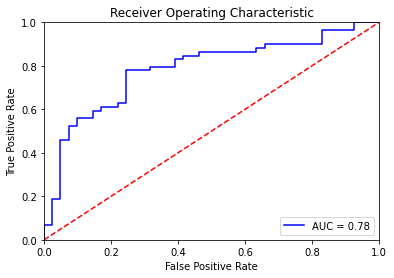

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_final_test, y_final_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Predicciones Individuales

In [ ]:
loadedModel.predict([[75,120,150]])

array([0], dtype=int64)

In [ ]:
loadedModel.predict_proba([[25,200,250]])

array([[0.38452148, 0.61547852]])

# Modelos No Supervisados